# Quelques chiffres sur les labels numériques des lycées de l'occitanie

## IMPORTING DATA

### Import label numérique lycee data from api

In [1]:
#importing necessary packages
import pandas as pd
import requests
import json

# get data 
#creating the url
url = 'https://data.occitanie.education.gouv.fr/api/records/1.0/search/?dataset=fr-en-occitanie-label-numerique-lycee&q=&rows=10000&facet=annee&facet=rne&facet=departement&facet=label'
#making the request
response = requests.get(url)
#converting the response to json
data = response.json()
#appending the data to the list

#creating an empty list to store the records
records = []

#looping through the records
for record in data['records']:
    #storing the records in the list
    records.append(record['fields'])

#creating a dataframe from the json
df = pd.DataFrame(records)

### Import label numérique lycee geoGson file from local repository

In [2]:
# Read the GeoJSON file
with open('../fr-en-occitanie-label-numerique-lycee.geojson') as f:
    data = json.load(f)

## INFORMATIONS ON DATAFRAME

In [3]:
#showing the complete dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   label              734 non-null    object
 1   annee              734 non-null    object
 2   localite           734 non-null    object
 3   departement        734 non-null    object
 4   nom_etablissement  734 non-null    object
 5   position           734 non-null    object
 6   rne                734 non-null    object
dtypes: object(7)
memory usage: 40.3+ KB


**Informations :**

le dataframe contient 6 colonnes : 
- label : le niveau du label du lycée (1, 2 ou 3)
- annee : annee d'obtention du label
- localite : de l'établissement
- departement
- nom_etablissement
- position : coordonnées géographiques
- rne : identifiant national de l'établissement

In [4]:
df

label annee                  localite departement  \
0       1  2018                      Agde         034   
1       1  2019                      Agde         034   
2       2  2018                      Albi         081   
3       1  2017                      Albi         081   
4       1  2018                      Albi         081   
..    ...   ...                       ...         ...   
729     1  2018  Villefranche-de-Rouergue         012   
730     1  2018  Villefranche-de-Rouergue         012   
731     1  2019  Villefranche-de-Rouergue         012   
732     1  2018    Villelongue-dels-Monts         066   
733     2  2021    Villelongue-dels-Monts         066   

                                     nom_etablissement  \
0                 Lycée polyvalent Auguste Loubatières   
1                 Lycée polyvalent Auguste Loubatières   
2    Lycée d'enseignement général et technologique ...   
3               Lycée d'enseignement général Lapérouse   
4               Lycée d'enseignement général Lapérouse   
..                                                 ...   
729  Lycée d'enseignement général et technologique ...   
730       Établissement régional d'enseignement adapté   
731  Lycée d'enseignement général et technologique ...   
732                   Lycée professionnel Alfred Sauvy   
733                   Lycée professionnel Alfred Sauvy   

                           position       rne  
0    [43.3000701903, 3.48305956456]  0340002T  
1    [43.3000701903, 3.48305956456]  0340002T  
2    [43.9310426514, 2.15075998953]  0810004P  
3    [43.9302066348, 2.14718960529]  0810006S  
4    [43.9302066348, 2.14718960529]  0810006S  
..                              ...       ...  
729  [44.3546424798, 2.03704937648]  0120031U  
730  [44.3506941408, 2.00269023412]  0121178R  
731  [44.3546424798, 2.03704937648]  0120031U  
732  [42.5438599342, 2.89186960559]  0660026V  
733  [42.5438599342, 2.89186960559]  0660026V  

[734 rows x 7 columns]

In [5]:
df['rne'].nunique()

229

**Constatation :**
    
    - Il existe 229 lycées labelisés en occitanie

## TRANSFORM DATA 

In [6]:
# transformation

#create two new columns for longitude and latitude
df['latitude'] = df['position'].apply(lambda x: float(x[0]))
df['longitude'] = df['position'].apply(lambda x: float(x[1]))

## VISUALISATIONS

In [7]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium # for maps
import kaleido
from IPython.display import Image

### Boxplot : Distribution des lycées selon le niveau du label numérique par année

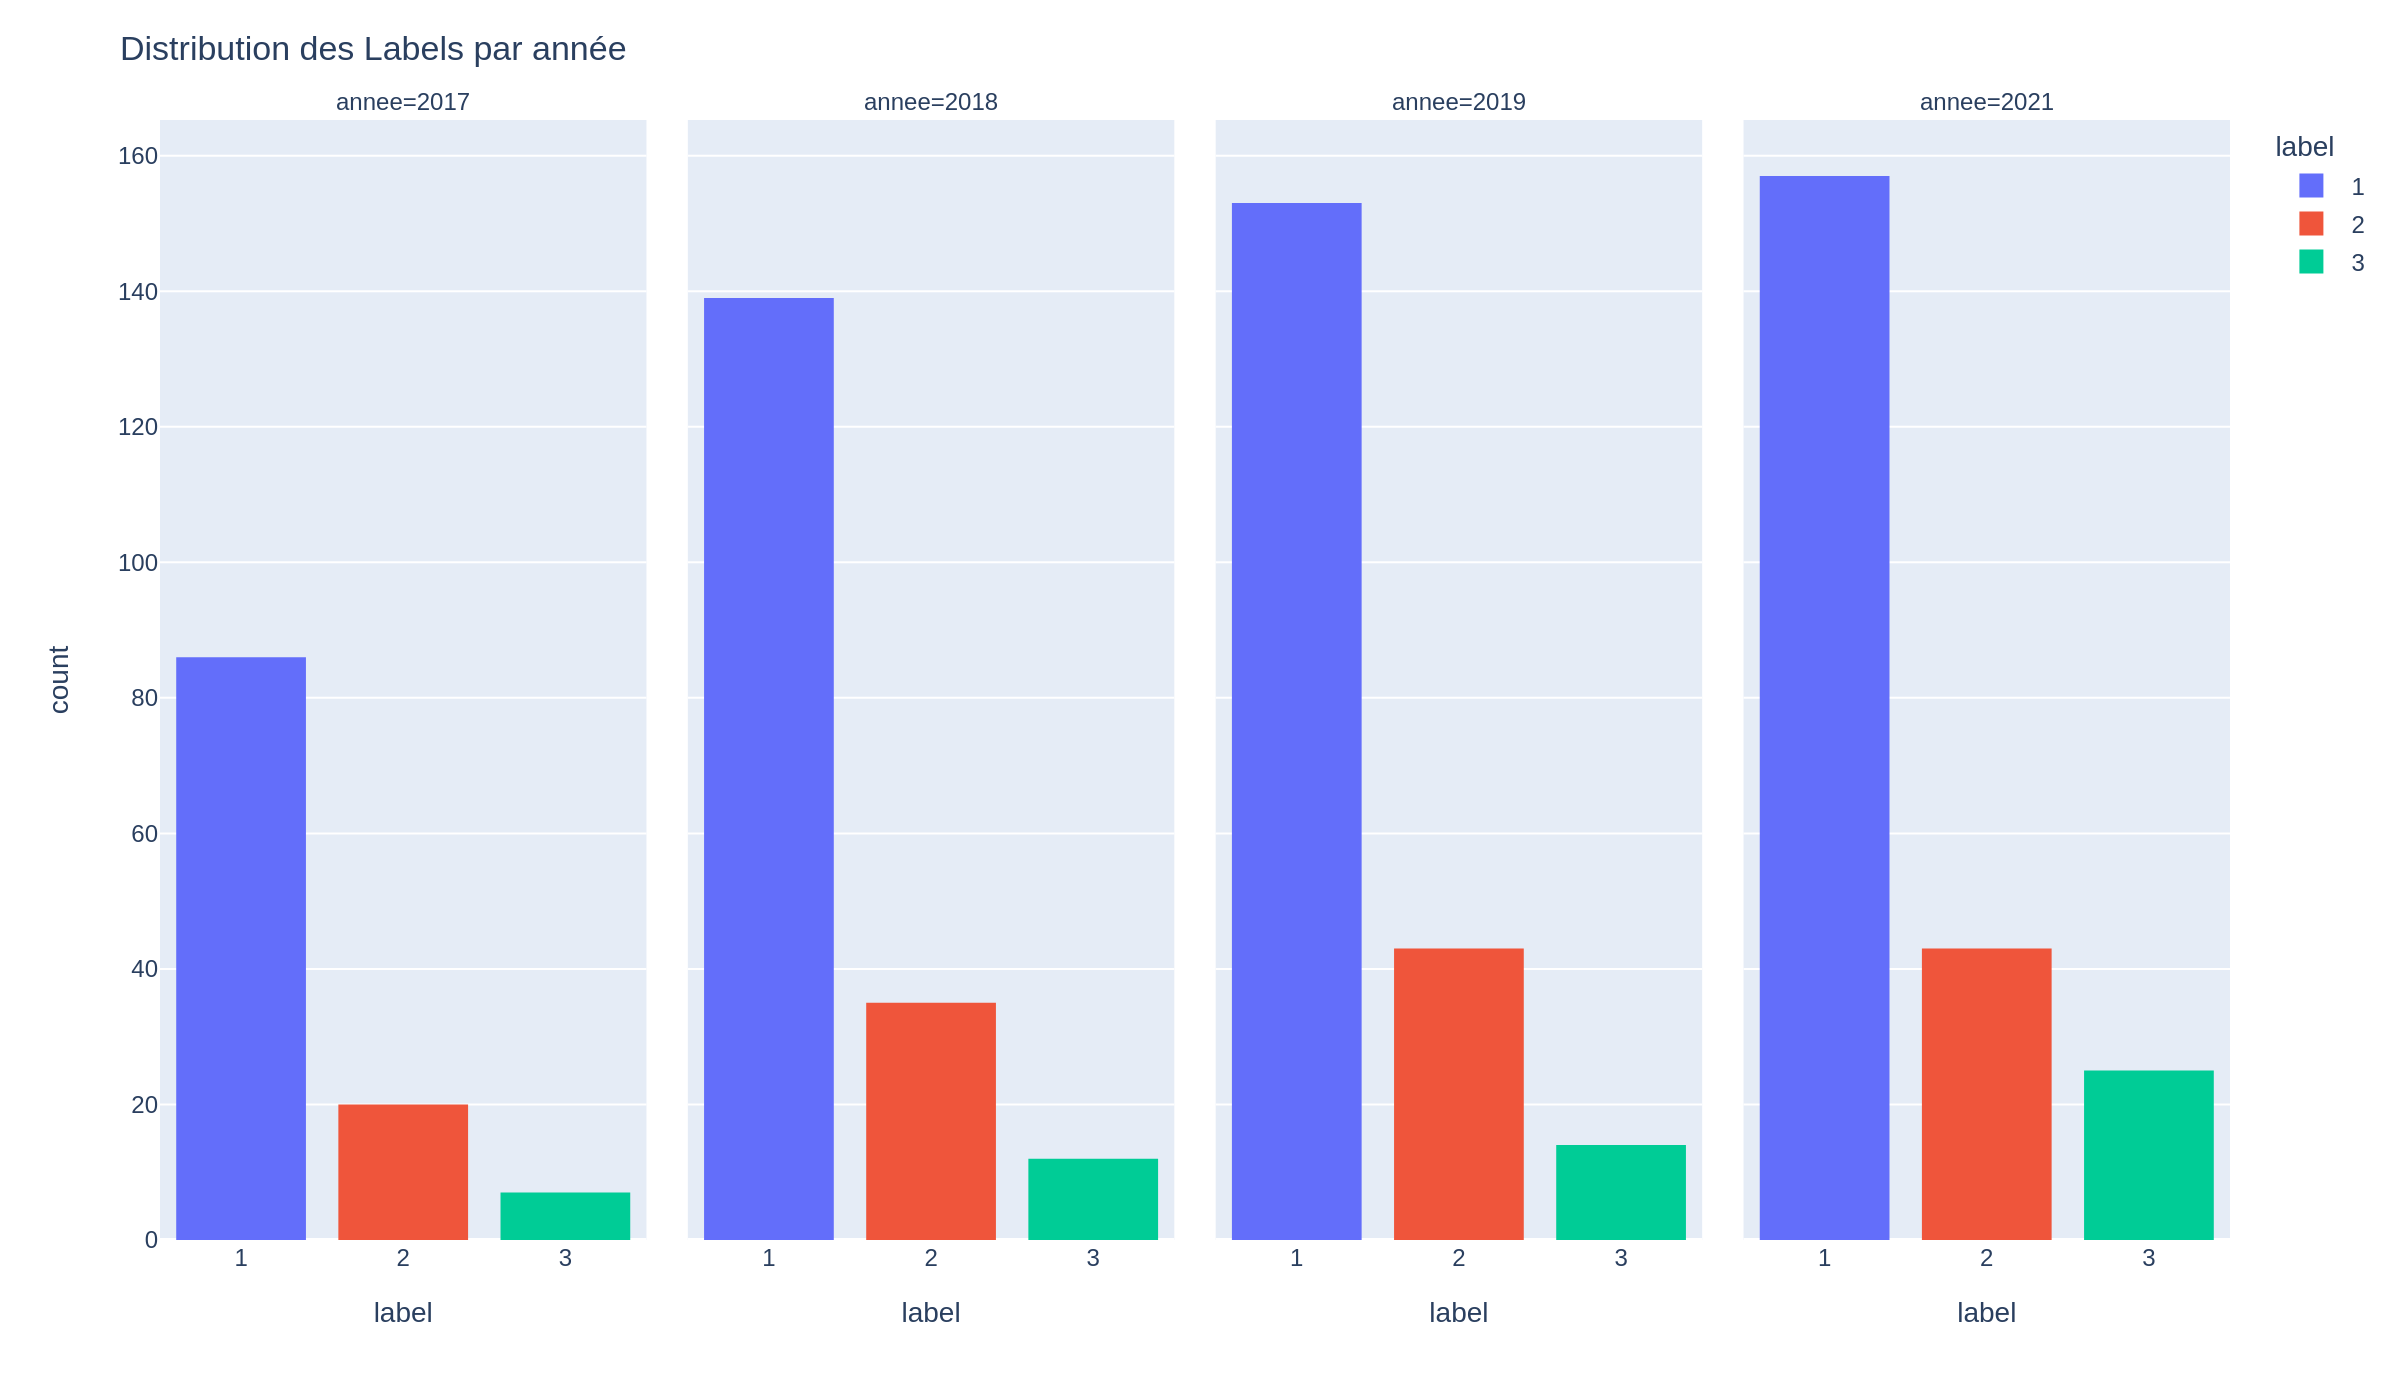

In [8]:
#transform the label to numeric
df["label"] = pd.to_numeric(df["label"])
#transform the annee to numeric
df["annee"] = pd.to_numeric(df["annee"])

#sorted by label ascending
df.sort_values(by=["label","annee"],inplace=True)

# re transform label in df_temp to str so it can be discrete value
df["label"] = df["label"].apply(str)
# re transform annee to str so it can be discrete value
df["annee"] = df["annee"].apply(str)

#plotting a histogram to show the distribution of the labels
fig = px.histogram(df, x="label", nbins=10, color="label", facet_col="annee" )
fig.update_layout(title_text="Distribution des Labels par année")
#fig.show()
image = fig.to_image(format='png',width=1200, height=700, scale=2)
Image(image)

**Interprétation :**
    
    - D'après le graphique ci-dessous, on constate que le nombre des lycées labelisés augmente chaque année.
    - Le niveau de label le plus répondu est le label 1 (qui est le niveau de label le plus faible)
    - Le niveau de label le moins répondu est le label 3 (qui est le niveau de label le plus fort)

### Maps

#### Carte : positions géographiques des lycées labelisés dans la région occitanie

In [10]:
#creating the map
m = folium.Map(location=[43.9310426514, 2.15075998953], zoom_start=7.4)

#adding the markers to the map
for feature in data['features']:
    label = feature['properties']['label']
    annee = feature['properties']['annee']
    localite = feature['properties']['localite']
    departement = feature['properties']['departement']
    nom_etablissement = feature['properties']['nom_etablissement']
    position = feature['properties']['position']
    rne = feature['properties']['rne']
    folium.Marker(position, popup=f'Label: {label}, Annee: {annee}, Localite: {localite}, Departement: {departement}, Nom_etablissement: {nom_etablissement}, RNE: {rne}').add_to(m)

#displaying the map
m

#### Carte : positions géographiques des lycées labelisés dans la région occitanie (avec le détail du niveau de label)

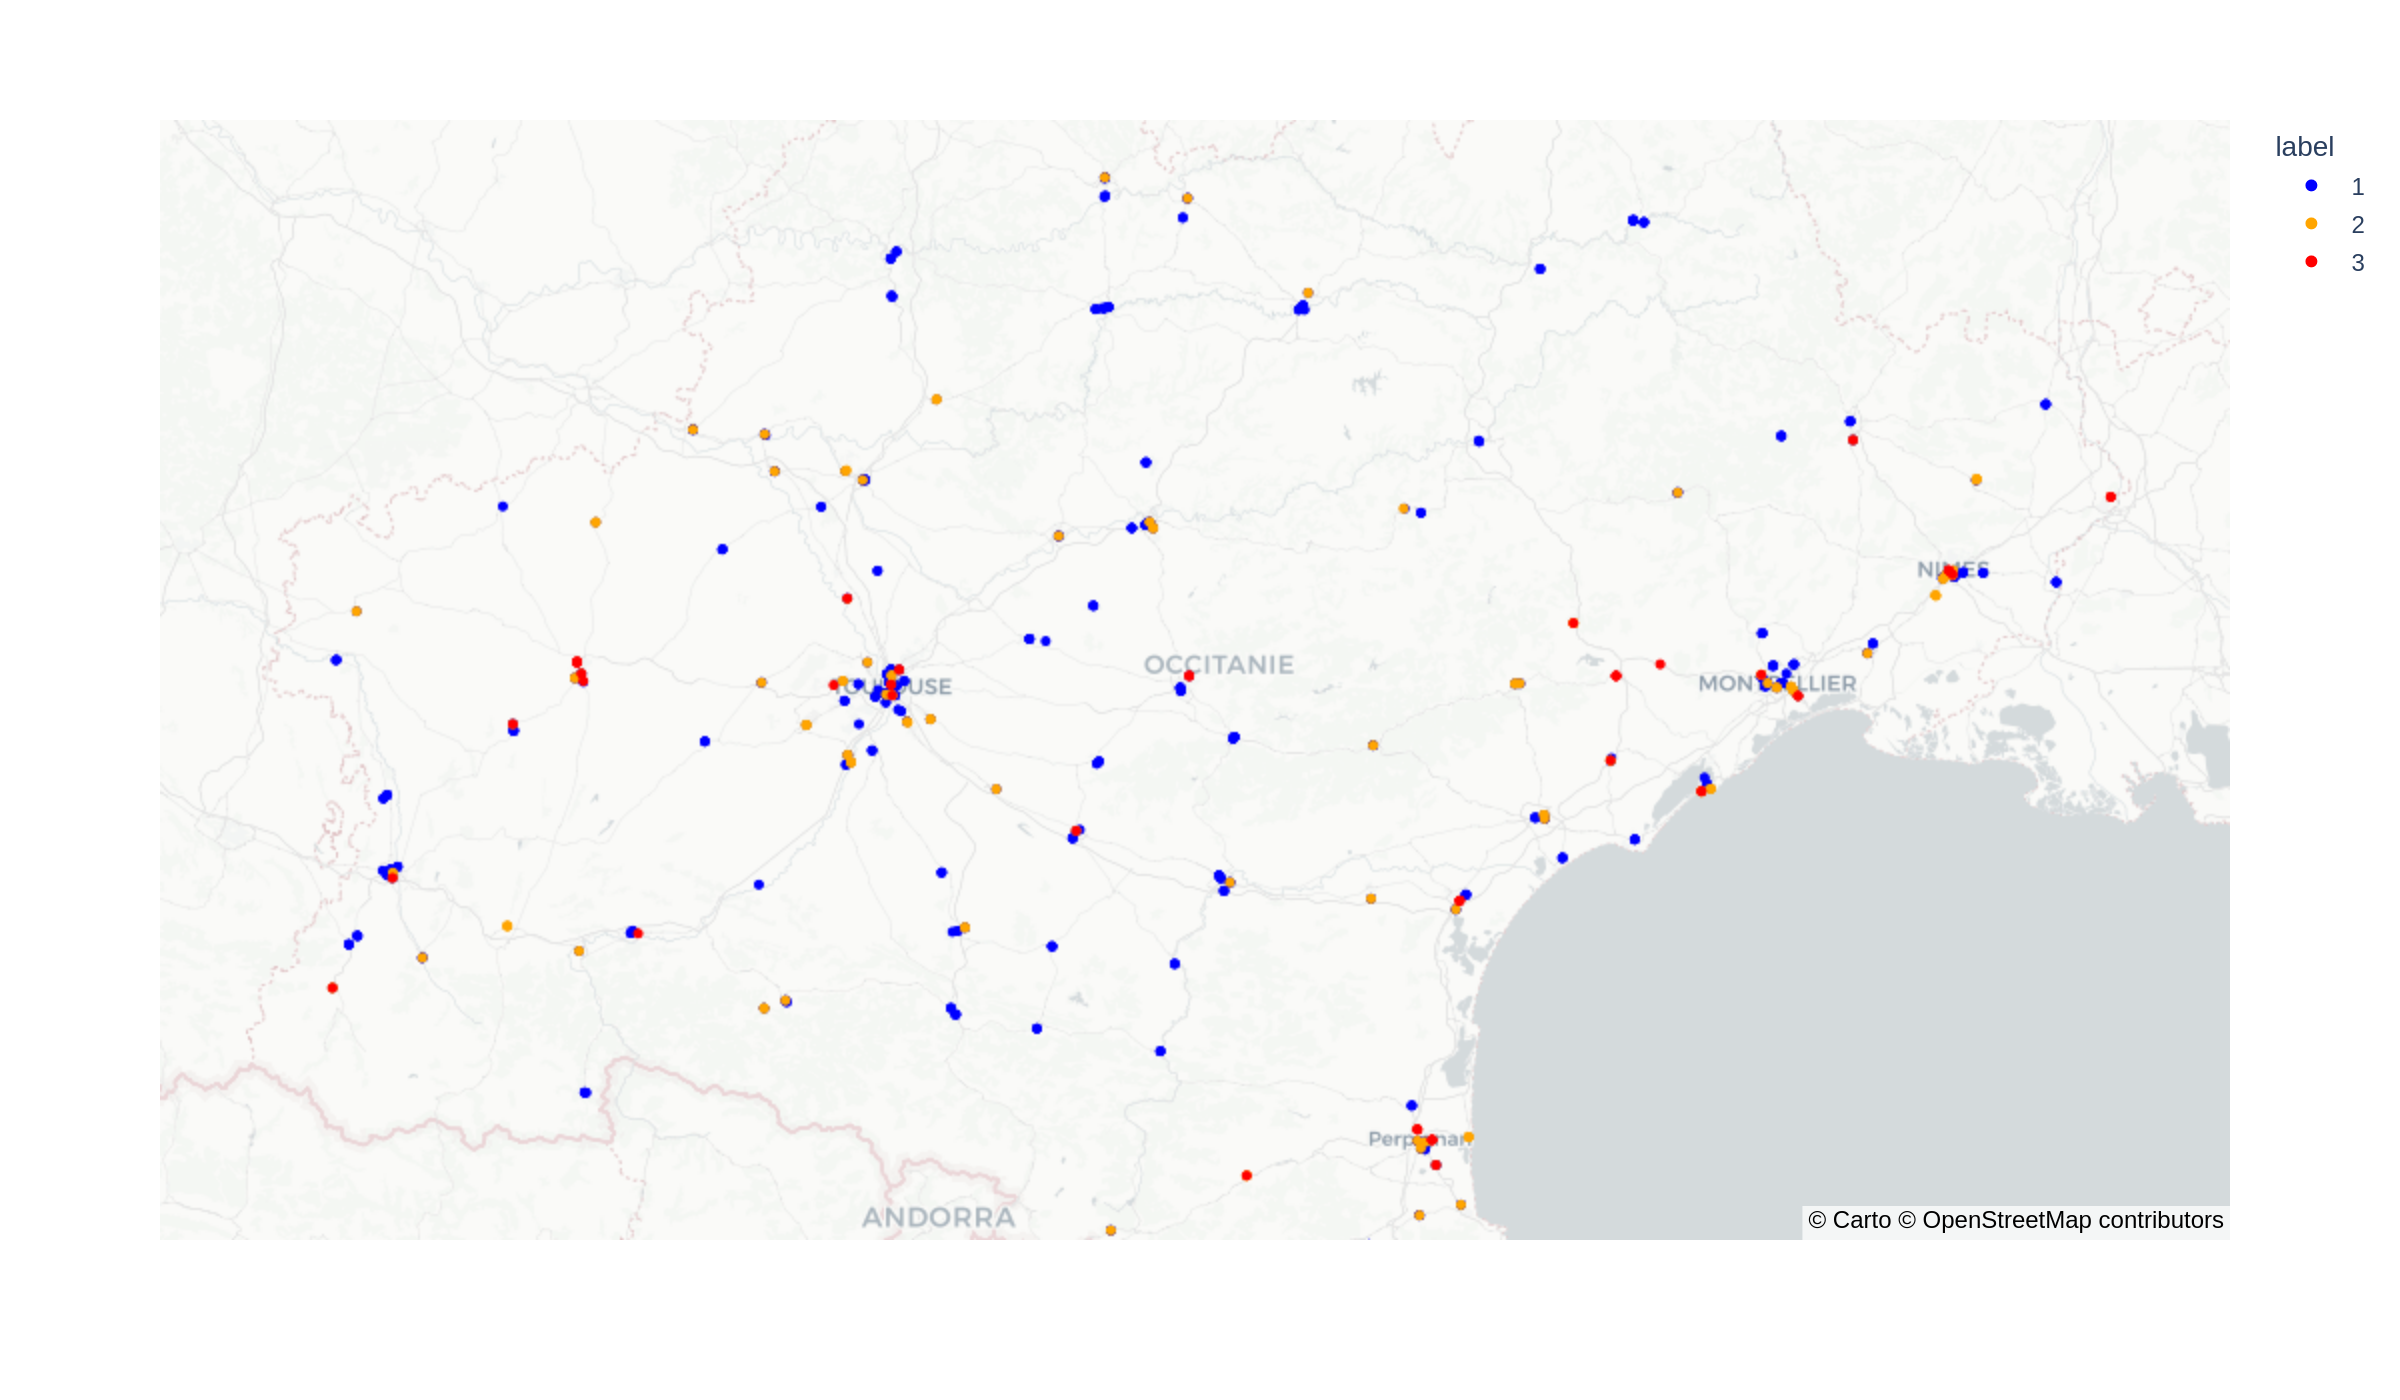

In [31]:
#transform the label to numeric
df["label"] = pd.to_numeric(df["label"])

#create df sorted by label ascending
df_temp = df.sort_values(by="label")

# re transform label in df_temp to str so it can be discrete value
df_temp["label"] = df_temp["label"].apply(str)

#plot map
fig = px.scatter_mapbox(df_temp, lat="latitude", lon="longitude", color="label",
                  color_discrete_map={'1' : 'blue', '2' : 'orange', '3' : "red"}, zoom=7,
                  mapbox_style='carto-positron')
#fig.show()
image = fig.to_image(format='png',width=1200, height=700, scale=2)
Image(image)

In [12]:
#creating the base map
m = folium.Map(location=[float(df.iloc[0]['position'][0]), float(df.iloc[0]['position'][1])], zoom_start=6)

#adding markers to the map
for i in range(len(df)):
    folium.Marker(location=[float(df.iloc[i]['position'][0]), float(df.iloc[i]['position'][1])],
                  popup=df.iloc[i]['nom_etablissement'],
                  icon=folium.Icon(color='red', icon='info-sign')).add_to(m)

#displaying the map
m

In [13]:
#folium.CircleMarker() function to create a circle marker on the map that is scaled according to the label
# of the etablissement. For example, if the label is 1, the circle marker can be smaller than if the label is 2. 

#creating the base map
m = folium.Map(location=[float(df.iloc[0]['position'][0]), float(df.iloc[0]['position'][1])], zoom_start=6)

#adding markers to the map
for i in range(len(df)):
    radius_temp = int(df.iloc[i]['label']) * 2
    folium.CircleMarker(location=[float(df.iloc[i]['position'][0]), float(df.iloc[i]['position'][1])],
                        radius=radius_temp,
                        popup=df.iloc[i]['nom_etablissement'],
                        color='red',
                        fill=True,
                        fill_color='blue',
                        fill_opacity=0.1).add_to(m)

#displaying the map
m

In [14]:
#transform the label to numeric
df["label"] = pd.to_numeric(df["label"])

# map with color scale on label
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", color="label", size="label",
                  color_continuous_scale=px.colors.diverging.Spectral_r, size_max=15, zoom=6,
                  mapbox_style='open-street-map')
#fig.show()